## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [2]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [4]:
y.backward()

In [5]:
x.grad

tensor([6.])

In [6]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [9]:
# your code here
x = torch.tensor([1., 2.], requires_grad=True)

# define the function y
y = torch.sigmoid(x)

# compute the gradient of y with respect to x
y.sum().backward()

print(x.grad)

# now using the formula
y = 1 / (1 + torch.exp(-x))

# derivating => d/dx 1 / 1 - e^(-x) = e^(-x) / (1 + e^(-x))^2 = y * (1 - y)
gradient_formula = y * (1 - y)

print(gradient_formula)

tensor([0.1966, 0.1050])
tensor([0.1966, 0.1050], grad_fn=<MulBackward0>)


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [11]:
# your code here
x = torch.tensor([1., 2.], requires_grad=True)

# define the function y
y = x

# compute the gradient of y with respect to x
y.sum().backward()

print(x.grad)

# now using the formula
gradient_formula = torch.ones_like(x)

print(gradient_formula)


tensor([1., 1.])
tensor([1., 1.])


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [14]:
# your code here
x = torch.tensor([-1., 0., 1.], requires_grad=True)

# define the function y
y = torch.max(torch.zeros_like(x), x)

# compute the gradient of y with respect to x
y.sum().backward()

print(x.grad)

# now using the formula. in x = 0, the gradient is not defined, so we will use the subgradient formula for x = 0
gradient_formula = torch.where(x > 0, 1., 0.)
gradient_formula[x == 0] = 0.5

print(gradient_formula)



tensor([0.0000, 0.5000, 1.0000])
tensor([0.0000, 0.5000, 1.0000])


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

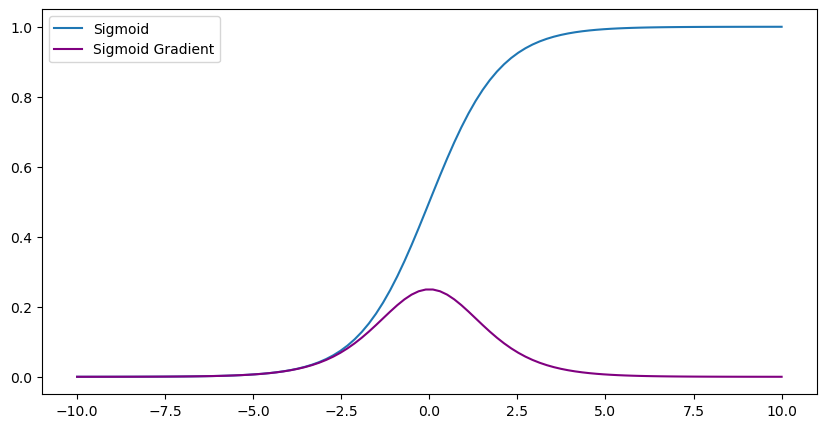

In [52]:
# your code here
import matplotlib.pyplot as plt

def plot_sigmoid():
    x = torch.linspace(-10, 10, 100)
    y = torch.sigmoid(x)
    y_gradient = y * (1 - y)

    fix, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(x, y, label='Sigmoid')
    ax.plot(x, y_gradient, 'purple', label='Sigmoid Gradient')
    ax.legend()
    plt.show()

plot_sigmoid()



Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

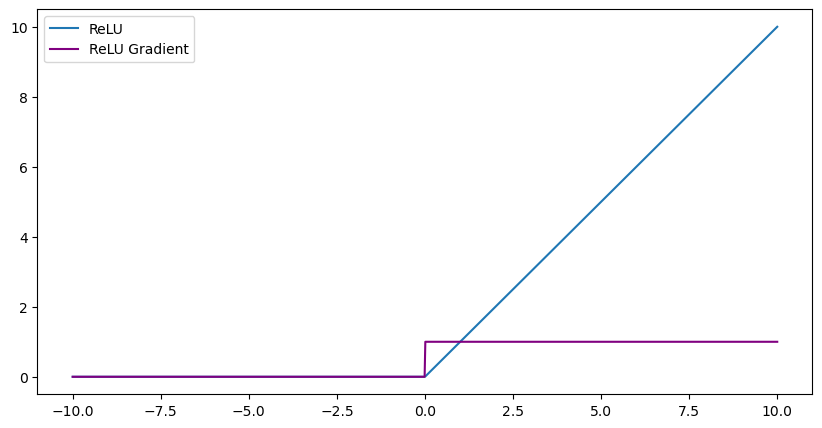

In [44]:
# your code here

def plot_relu():
    x = torch.linspace(-10, 10, 1000)
    y = torch.relu(x)
    y_gradient = torch.where(x > 0, 1., 0.)
    # y_gradient[x == 0] = 0

    fix, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(x, y, label='ReLU')
    ax.plot(x, y_gradient, 'purple', label='ReLU Gradient')
    ax.legend()
    plt.show()

plot_relu()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

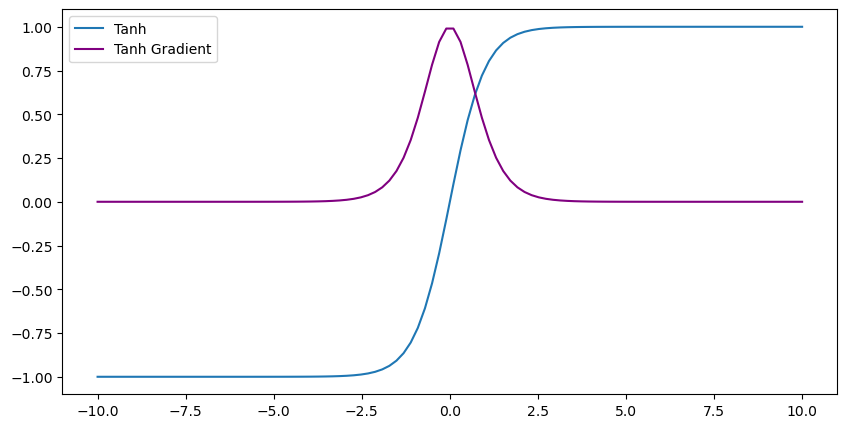

In [28]:
# your code here
def plot_tanh():
    x = torch.linspace(-10, 10, 100)
    y = torch.tanh(x)
    y_gradient = 1 - y ** 2

    fix, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(x, y, label='Tanh')
    ax.plot(x, y_gradient, 'purple', label='Tanh Gradient')
    ax.legend()
    plt.show()

plot_tanh()

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

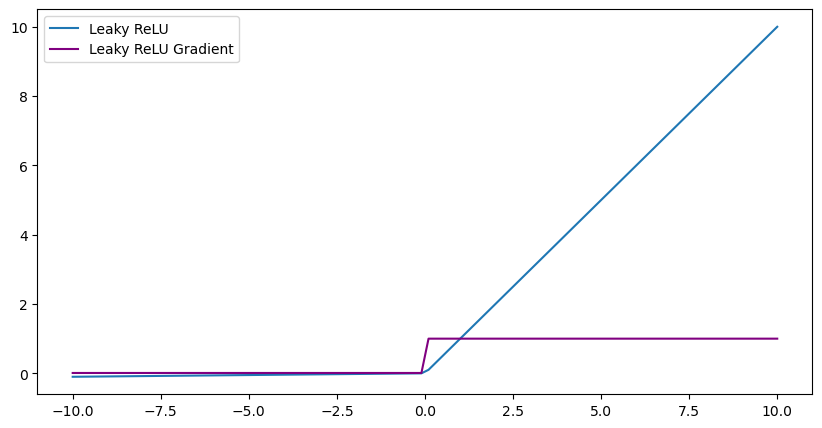

In [32]:
# your code here

def plot_leaky_relu():
    x = torch.linspace(-10, 10, 100)
    y = torch.max(0.01 * x, x)
    y_gradient = torch.where(x > 0, 1., 0.01)

    fix, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(x, y, label='Leaky ReLU')
    ax.plot(x, y_gradient, 'purple', label='Leaky ReLU Gradient')
    ax.legend()
    plt.show()

plot_leaky_relu()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [5]:
import torch
import torch.nn as nn



class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [53]:
input_size = 2
output_size = 1

perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.4059], grad_fn=<SigmoidBackward0>)


In [54]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6491
Epoch [200/1000], Loss: 0.6466
Epoch [300/1000], Loss: 0.6465
Epoch [400/1000], Loss: 0.6464
Epoch [500/1000], Loss: 0.6464
Epoch [600/1000], Loss: 0.6464
Epoch [700/1000], Loss: 0.6464
Epoch [800/1000], Loss: 0.6464
Epoch [900/1000], Loss: 0.6464
Epoch [1000/1000], Loss: 0.6464


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [12]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        # linear activation function
        # self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.linear(x)
        # x = self.activation(x)
        return x


In [13]:
input_size = 2
output_size = 1
losses = []

# Define the perceptron, loss function and optimizer
perceptron = Perceptron(input_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)

# Define the dataset
input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]]) # all possible inputs
labels = torch.tensor([[0.], [1.], [1.], [1.]]) # OR logic

# Train the model
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)

    # Compute the loss
    loss = criterion(outputs, labels)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad() # clear the gradients
    loss.backward() # compute the gradients
    optimizer.step() # update the weights

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/5000], Loss: 0.3821
Epoch [200/5000], Loss: 0.2920
Epoch [300/5000], Loss: 0.2342
Epoch [400/5000], Loss: 0.1944
Epoch [500/5000], Loss: 0.1656
Epoch [600/5000], Loss: 0.1439
Epoch [700/5000], Loss: 0.1269
Epoch [800/5000], Loss: 0.1134
Epoch [900/5000], Loss: 0.1023
Epoch [1000/5000], Loss: 0.0931
Epoch [1100/5000], Loss: 0.0853
Epoch [1200/5000], Loss: 0.0787
Epoch [1300/5000], Loss: 0.0730
Epoch [1400/5000], Loss: 0.0680
Epoch [1500/5000], Loss: 0.0637
Epoch [1600/5000], Loss: 0.0598
Epoch [1700/5000], Loss: 0.0564
Epoch [1800/5000], Loss: 0.0533
Epoch [1900/5000], Loss: 0.0505
Epoch [2000/5000], Loss: 0.0480
Epoch [2100/5000], Loss: 0.0458
Epoch [2200/5000], Loss: 0.0437
Epoch [2300/5000], Loss: 0.0418
Epoch [2400/5000], Loss: 0.0400
Epoch [2500/5000], Loss: 0.0384
Epoch [2600/5000], Loss: 0.0369
Epoch [2700/5000], Loss: 0.0356
Epoch [2800/5000], Loss: 0.0343
Epoch [2900/5000], Loss: 0.0331
Epoch [3000/5000], Loss: 0.0320
Epoch [3100/5000], Loss: 0.0309
Epoch [3200/5000]

In [14]:
# Evaluate the model
with torch.no_grad():
    outputs = perceptron(input_data)
    print("Predictions:", outputs)

    # apply the sigmoid function to the outputs to get the predicted labels
    predicted = (torch.sigmoid(outputs) > 0.5).float()
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    print(f'Accuracy: {accuracy * 100}%')

Predictions: tensor([[-3.1372],
        [ 4.0836],
        [ 4.0818],
        [11.3026]])
Accuracy: 100.0%


# Visualize the loss

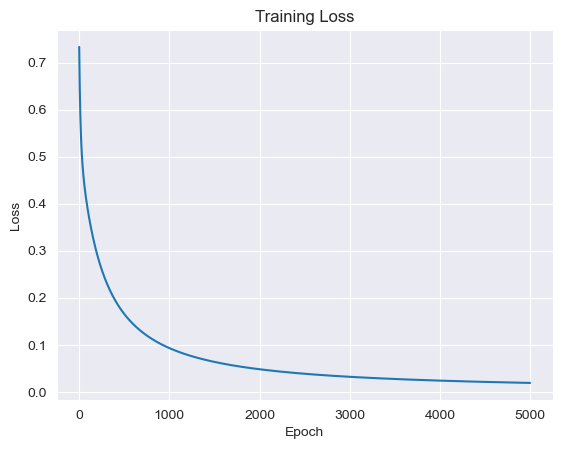

In [16]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()